# 

In [3]:
import pandas as pd



In [4]:
df=pd.read_csv('dataset_with_missing_values.csv')

In [5]:
df.head()

,ID,Name,Age,Salary,Department,Joining Date
0,1,Alice,25.0,50000.0,HR,2020-01-15
1,2,Bob,30.0,60000.0,IT,2019-08-22
2,3,Charlie,NaN,55000.0,Finance,2021-06-30
3,4,David,45.0,NaN,Marketing,2018-04-12
4,5,Eve,28.0,52000.0,NaN,NaN


In [6]:
df.head(10)

,ID,Name,Age,Salary,Department,Joining Date
0,1,Alice,25.0,50000.0,HR,2020-01-15
1,2,Bob,30.0,60000.0,IT,2019-08-22
2,3,Charlie,NaN,55000.0,Finance,2021-06-30
3,4,David,45.0,NaN,Marketing,2018-04-12
4,5,Eve,28.0,52000.0,NaN,NaN
5,6,NaN,35.0,58000.0,IT,2020-09-18
6,7,Grace,NaN,61000.0,Finance,2021-11-05
7,8,Hannah,40.0,NaN,HR,NaN
8,9,Isaac,50.0,49000.0,Marketing,2017-03-27
9,10,Jack,29.0,53000.0,NaN,2019-12-09


In [7]:
df.isnull()

,ID,Name,Age,Salary,Department,Joining Date
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,True,True
5,False,True,False,False,False,False
6,False,False,True,False,False,False
7,False,False,False,True,False,True
8,False,False,False,False,False,False
9,False,False,False,False,True,False


In [8]:
df.isnull().sum()

ID              0
Name            1
Age             2
Salary          2
Department      2
Joining Date    2
dtype: int64

In [9]:
df[['Name']].isnull().sum()

Name    1
dtype: int64

In [10]:
nf=df.dropna()

In [11]:
nf

,ID,Name,Age,Salary,Department,Joining Date
0,1,Alice,25.0,50000.0,HR,2020-01-15
1,2,Bob,30.0,60000.0,IT,2019-08-22
8,9,Isaac,50.0,49000.0,Marketing,2017-03-27


In [12]:
nf.shape

(3, 6)

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import seaborn as sns

<Axes: ylabel='Count'>

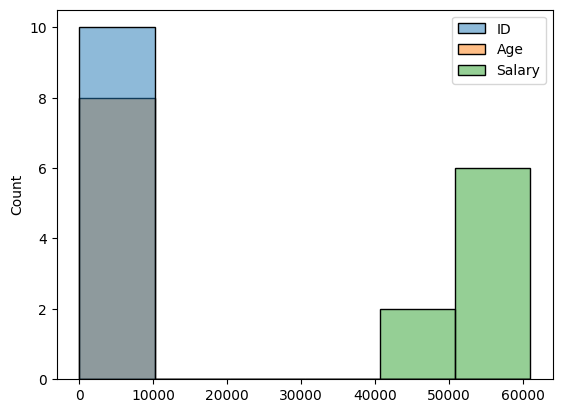

In [19]:
sns.histplot(df)

#In this we will see the histogram curve for each attributes not for whole table at a time 

<Axes: xlabel='Age', ylabel='Count'>

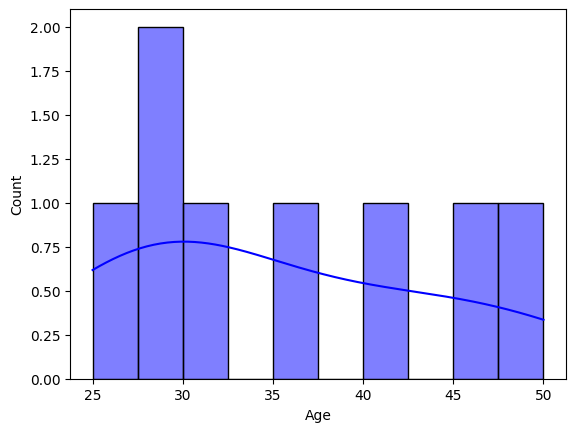

In [25]:
sns.histplot(df['Age'], bins=10,kde=True,  color="blue")

In [26]:
#let first see for the age how it is distributed 

<Axes: xlabel='Age', ylabel='Count'>

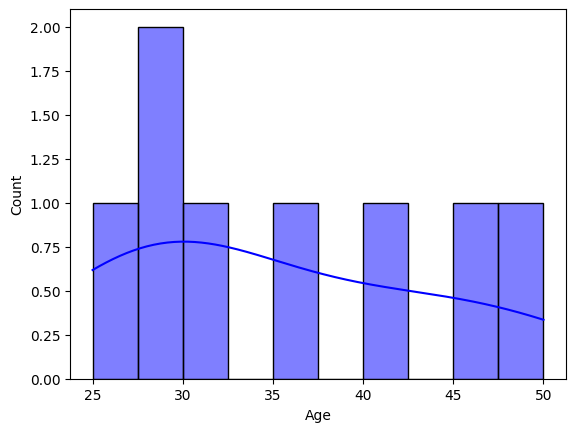

In [25]:
sns.histplot(df['Age'], bins=10,kde=True,  color="blue")

# for the graph we can see that age is left sweked so, we will use median to fill the null values

In [29]:
df['Age_median']=df['Age'].fillna(df['Age'].median())

In [30]:
df['Age_median']

0    25.0
1    30.0
2    32.5
3    45.0
4    28.0
5    35.0
6    32.5
7    40.0
8    50.0
9    29.0
Name: Age_median, dtype: float64

In [31]:
# now check for the salary 

In [34]:
df['Salary'].isnull().sum()

2

<Axes: xlabel='Salary', ylabel='Count'>

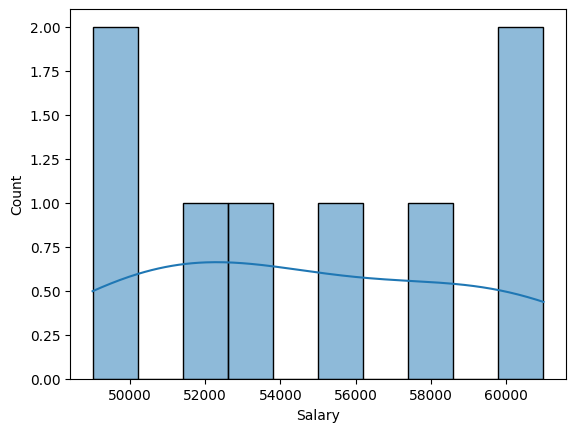

In [37]:
sns.histplot(df['Salary'], bins=10 , kde= True ,discrete=False)

In [38]:
# since it is also left sweked therfore we will use median

In [40]:
df['Salary_median']=df['Salary'].fillna(df['Salary'].median())

In [42]:
df['Salary_median']

0    50000.0
1    60000.0
2    55000.0
3    54000.0
4    52000.0
5    58000.0
6    61000.0
7    54000.0
8    49000.0
9    53000.0
Name: Salary_median, dtype: float64

<Axes: xlabel='Salary_median', ylabel='Count'>

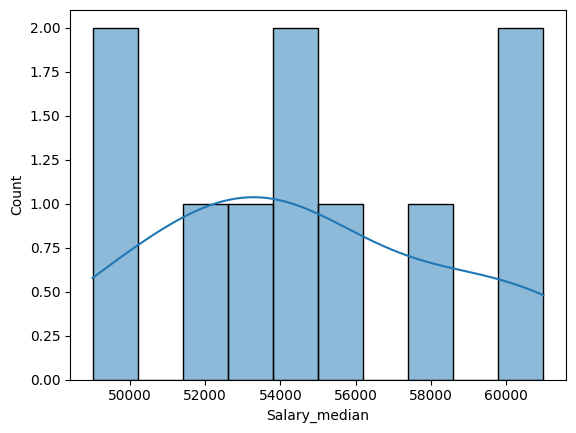

In [44]:
sns.histplot(df['Salary_median'] ,bins=10 , kde=True)

In [45]:
# now check for the name 

In [46]:
# Since it is a string so, we need to use mode thing 

In [48]:
df['Unique_name']=df['Name'].unique()

In [49]:
df['Unique_name']

0      Alice
1        Bob
2    Charlie
3      David
4        Eve
5        NaN
6      Grace
7     Hannah
8      Isaac
9       Jack
Name: Unique_name, dtype: object

In [50]:
df['Department'].unique()

array(['HR', 'IT', 'Finance', 'Marketing', nan], dtype=object)

In [51]:
df['Department'].isnull().sum()

2

In [57]:
modevalue=df[df['Department'].notna()]['Department'].mode()[0]

In [58]:
print(modevalue)

Finance


In [59]:
df['Department'].fillna(modevalue)

0           HR
1           IT
2      Finance
3    Marketing
4      Finance
5           IT
6      Finance
7           HR
8    Marketing
9      Finance
Name: Department, dtype: object